# 1. Exploratory Data Analysis (EDA)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import os

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

import pylab 
import scipy.stats as stats

In [3]:
# Load dataset files
train = pd.read_csv('train.csv')
train_extra = pd.read_csv("training_extra.csv")

test = pd.read_csv('test.csv')

submission = pd.read_csv('sample_submission.csv')

In [4]:
print("Shape before removing missing values:", train_extra.shape)
train_extra.dropna(inplace=True)
print("Shape after removing missing values:", train_extra.shape)

Shape before removing missing values: (3694318, 11)
Shape after removing missing values: (3041817, 11)


In [5]:
# Merge additional training data
train = pd.concat([train, train_extra], ignore_index=True)

In [6]:
# Display dataset info
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341817 entries, 0 to 3341816
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 280.5+ MB


,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [7]:
train.describe()

,id,Compartments,Weight Capacity (kg),Price
count,3.341817e+06,3.341817e+06,3.341679e+06,3.341817e+06
mean,2.150308e+06,5.440901e+00,1.799871e+01,8.147703e+01
std,1.196026e+06,2.889168e+00,6.968061e+00,3.883295e+01
min,0.000000e+00,1.000000e+00,5.000000e+00,1.500000e+01
25%,1.150705e+06,3.000000e+00,1.205849e+01,4.777029e+01
50%,2.165558e+06,5.000000e+00,1.802952e+01,8.115334e+01
75%,3.180235e+06,8.000000e+00,2.397621e+01,1.148065e+02
max,4.194317e+06,1.000000e+01,3.000000e+01,1.500000e+02


In [8]:
train.isna().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [9]:
train.dropna(inplace=True)
print("Dataset shape after dropping missing values:", train.shape)

Dataset shape after dropping missing values: (3288503, 11)


In [10]:
train.isna().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [11]:
train.drop('id', axis=1, inplace=True)

train.shape, test.shape

((3288503, 10), (200000, 10))

In [12]:
for col in train:
    if train[col].dtype == 'object':
        print(col,train[col].unique() )
    if train[col].dtype == 'float64':
        print(col,train[col].unique() )
    

Brand ['Jansport' 'Under Armour' 'Nike' 'Adidas' 'Puma']
Material ['Leather' 'Canvas' 'Nylon' 'Polyester']
Size ['Medium' 'Small' 'Large']
Compartments [ 7. 10.  2.  8.  1.  5.  3.  6.  4.  9.]
Laptop Compartment ['Yes' 'No']
Waterproof ['No' 'Yes']
Style ['Tote' 'Messenger' 'Backpack']
Color ['Black' 'Green' 'Red' 'Blue' 'Gray' 'Pink']
Weight Capacity (kg) [11.61172281 27.07853658 16.64375995 ...  9.54895871 12.79080004
 16.64173875]
Price [112.15875  68.88056  39.1732  ...  99.29504  97.21854  24.70114]


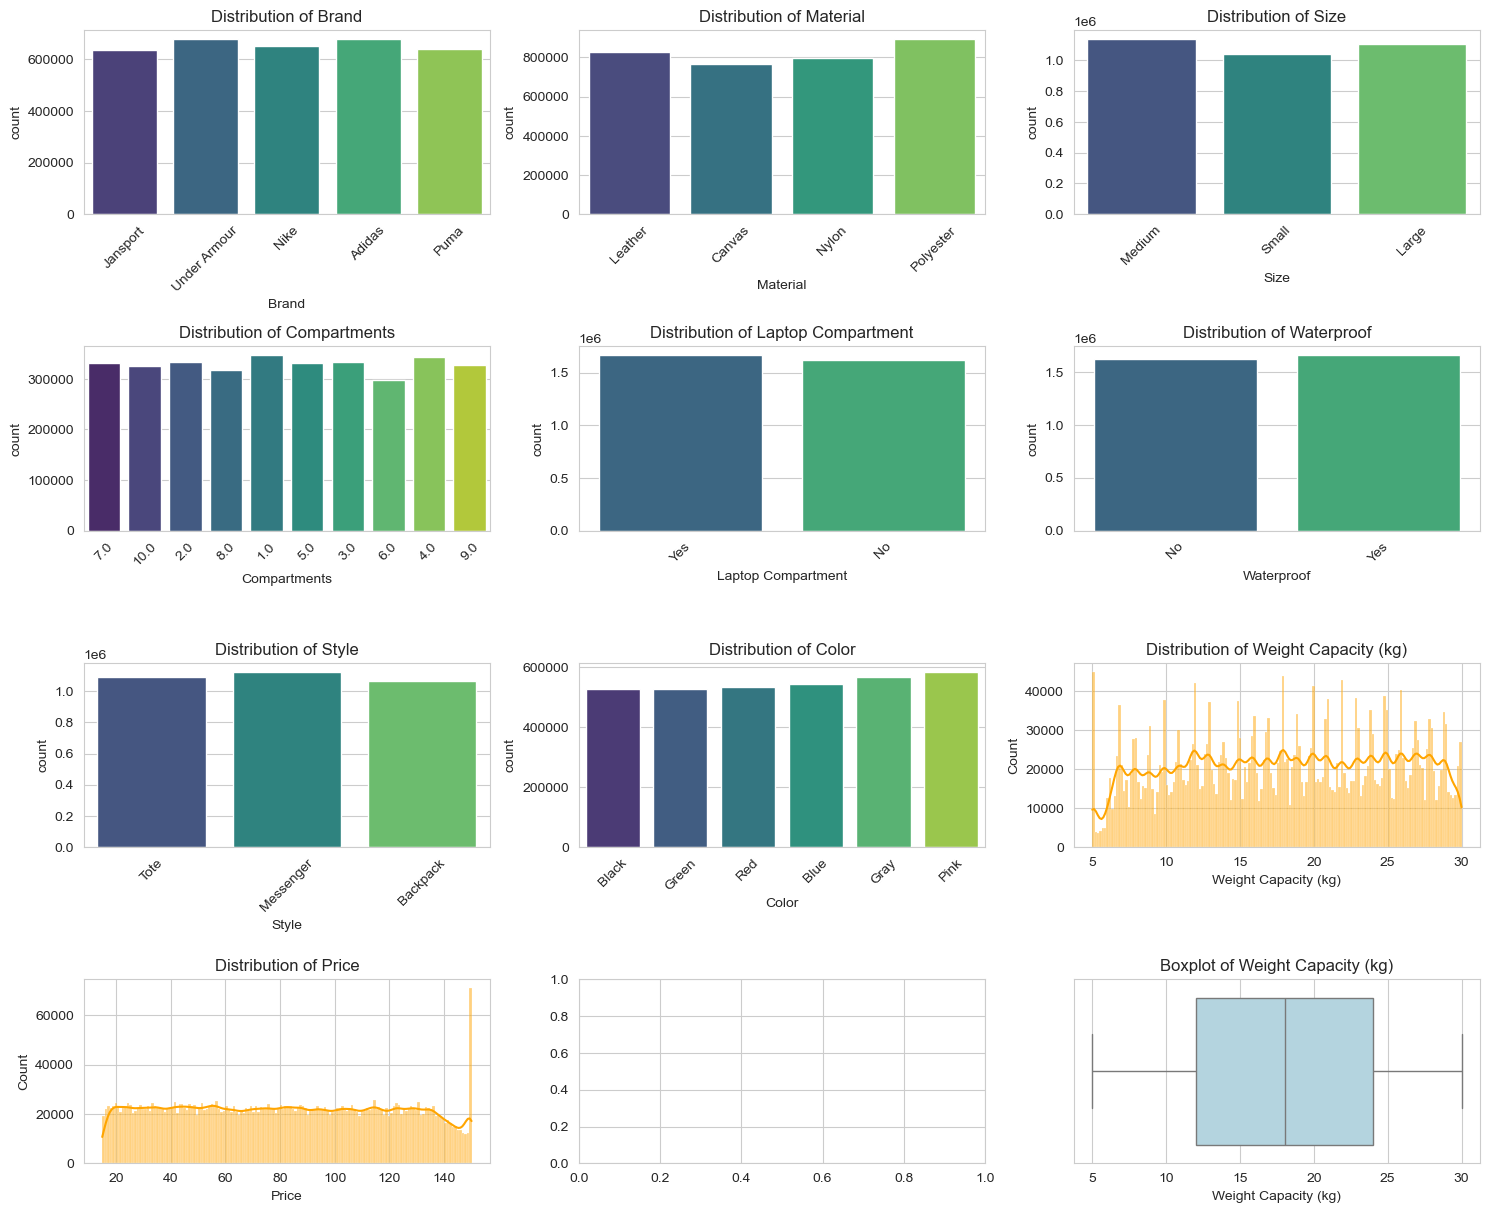

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create a 5x3 grid of subplots (extra row for boxplots)
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Define features to plot
categorical_features = ['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
numerical_features = ['Weight Capacity (kg)', 'Price']

# Convert categorical features to string 
for feature in categorical_features:
    train[feature] = train[feature].astype(str)

# Plot count plots for categorical features
for i, feature in enumerate(categorical_features):
    row, col = divmod(i, 3)
    sns.countplot(x=train[feature], hue=train[feature], legend=False, ax=axes[row, col], palette="viridis")
    axes[row, col].set_title(f"Distribution of {feature}")
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=10)  # Rotate x-axis labels

# Plot histograms and boxplots for numerical features
for i, feature in enumerate(numerical_features):
    row, col = divmod(len(categorical_features) + i, 3)
    
    # Histogram
    sns.histplot(train[feature], kde=True, ax=axes[row, col], color='orange')
    axes[row, col].set_title(f"Distribution of {feature}")

    # Boxplot below histogram (using extra row)
    boxplot_row = row + 1 if row + 1 < 5 else row  # Prevents index error
    sns.boxplot(x=train[feature], ax=axes[boxplot_row, col], color='lightblue')
    axes[boxplot_row, col].set_title(f"Boxplot of {feature}")

# Hide any empty subplots
for i in range(len(categorical_features) + 2 * len(numerical_features), 15):
    row, col = divmod(i, 3)
    fig.delaxes(axes[row, col])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288503 entries, 0 to 3341816
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 object 
 1   Material              object 
 2   Size                  object 
 3   Compartments          object 
 4   Laptop Compartment    object 
 5   Waterproof            object 
 6   Style                 object 
 7   Color                 object 
 8   Weight Capacity (kg)  float64
 9   Price                 float64
dtypes: float64(2), object(8)
memory usage: 276.0+ MB


In [15]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   Price   200000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 3.1 MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    200000 non-null  int64  
 1   Brand                 193773 non-null  object 
 2   Material              194387 non-null  object 
 3   Size                  195619 non-null  object 
 4   Compartments          200000 non-null  float64
 5   Laptop Compartment    195038 non-null  object 
 6   Waterproof            195189 non-null  object 
 7   Style                 194847 non-null  object 
 8   Color                 193215 non-null  object 
 9   Weight Capacity (kg)  199923 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 15.3+ MB


In [17]:
test.isna().sum()

id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

# 2. Feature Engineering

In [19]:
for col in test:
    if test[col].dtype == 'object':
        test[col] = test[col].fillna('not listed')
    if test[col].dtype == 'int' or test[col].dtype == 'float':
        test[col] = test[col].fillna(-1)

test.isna().sum().sum()

0

In [28]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

for col in train:
    if train[col].dtype == 'object':
        train[col] = enc.fit_transform(train[col].values.reshape(-1,1))
        test[col] = enc.transform(test[col].values.reshape(-1,1))

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288503 entries, 0 to 3341816
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 float64
 1   Material              float64
 2   Size                  float64
 3   Compartments          float64
 4   Laptop Compartment    float64
 5   Waterproof            float64
 6   Style                 float64
 7   Color                 float64
 8   Weight Capacity (kg)  float64
 9   Price                 float64
dtypes: float64(10)
memory usage: 276.0 MB


In [34]:
for col in train:
    if train[col].dtype == 'float64':
        print(col,train[col].unique() )

Brand [1. 4. 2. 0. 3.]
Material [1. 0. 2. 3.]
Size [1. 2. 0.]
Compartments [7. 1. 2. 8. 0. 5. 3. 6. 4. 9.]
Laptop Compartment [1. 0.]
Waterproof [0. 1.]
Style [2. 1. 0.]
Color [0. 3. 5. 1. 2. 4.]
Weight Capacity (kg) [11.61172281 27.07853658 16.64375995 ...  9.54895871 12.79080004
 16.64173875]
Price [112.15875  68.88056  39.1732  ...  99.29504  97.21854  24.70114]


In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    200000 non-null  int64  
 1   Brand                 200000 non-null  float64
 2   Material              200000 non-null  float64
 3   Size                  200000 non-null  float64
 4   Compartments          200000 non-null  float64
 5   Laptop Compartment    200000 non-null  float64
 6   Waterproof            200000 non-null  float64
 7   Style                 200000 non-null  float64
 8   Color                 200000 non-null  float64
 9   Weight Capacity (kg)  200000 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 15.3 MB


## Reduce Data Size with Efficient Data Types

### ✅ Effect: Reduces memory usage by ~30-50%, improving training speed.

In [38]:
# Get common columns between train and test to avoid KeyError
common_cols = list(set(train.columns) & set(test.columns))

# Convert float64 to float32 (only for common columns)
for col in train.select_dtypes(include=['float64']).columns:
    if col in common_cols:  # Only modify columns that exist in both datasets
        test[col] = test[col].astype('float32')
    train[col] = train[col].astype('float32')

# Convert int64 to int32 (except 'id')
for col in train.select_dtypes(include=['int64']).columns:
    if col != 'id' and col in common_cols:
        test[col] = test[col].astype('int32')
    if col != 'id':  
        train[col] = train[col].astype('int32')

In [40]:
X = train.drop(columns=['Price'])  # Drop target column
y = train['Price']  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes (remove X_val and y_val)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2630802, 9), (2630802,), (657701, 9), (657701,))

In [42]:
print("Unique values in y_train:", np.unique(y_train))
print("Data type of y_train:", y_train.dtype)

Unique values in y_train: [ 15.       15.00634  15.01818 ... 149.99255 149.99422 150.     ]
Data type of y_train: float32


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288503 entries, 0 to 3341816
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 float32
 1   Material              float32
 2   Size                  float32
 3   Compartments          float32
 4   Laptop Compartment    float32
 5   Waterproof            float32
 6   Style                 float32
 7   Color                 float32
 8   Weight Capacity (kg)  float32
 9   Price                 float32
dtypes: float32(10)
memory usage: 150.5 MB


# 3. Ensemble Modeling

In [59]:
import time
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, random_state=42)
}

# Store results
results = []

for name, model in models.items():
    start_time = time.time()  # Start time tracking
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    
    mse = mean_squared_error(y_test, y_pred)  # Compute MSE
    rmse = np.sqrt(mse)  # Compute RMSE
    r2 = r2_score(y_test, y_pred)  # Compute R² score (accuracy)
    run_time = time.time() - start_time  # Calculate runtime
    
    # Store results
    results.append([name, mse, rmse, r2, run_time])

# Convert results to DataFrame
df_results = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "R² Score", "Run Time (s)"])
df_results.sort_values(by="MSE", ascending=True, inplace=True)  # Sort by best MSE

# Print results
print(df_results)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 2630802, number of used features: 9
[LightGBM] [Info] Start training from score 81.478594
               Model          MSE       RMSE  R² Score  Run Time (s)
5           LightGBM  1503.120335  38.770096  0.002029      7.797902
3  Gradient Boosting  1503.322984  38.772709  0.001894    320.225307
4            XGBoost  1504.049927  38.782082  0.001411      7.993886
6           AdaBoost  1504.943684  38.793604  0.000818     37.003004
0  Linear Regression  1505.548950  38.801403  0.000416      0.383062
1      Random Forest  1629.715749  40.369738 -0.082022   1865.625134
2      Decision Tree  3078.011

# 4. Hyperparameter Tuning

## LightGBM Model

In [52]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

# Split dataset (assuming X, y are defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for LightGBM
lgb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 5, 10, 15],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

lgb_model = lgb.LGBMRegressor(random_state=42)
lgb_search = RandomizedSearchCV(lgb_model, lgb_params, cv=3, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
lgb_search.fit(X_train, y_train)
best_lgb = lgb_search.best_estimator_

# Train best LightGBM model
start_time = time.time()
best_lgb.fit(X_train, y_train)
y_pred = best_lgb.predict(X_test)

# Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
runtime = time.time() - start_time

# Results
results = pd.DataFrame([["Tuned LightGBM", mse, rmse, r2, runtime]], 
                        columns=["Model", "MSE", "RMSE", "R² Score", "Run Time (s)"])
print(results)

            Model          MSE       RMSE  R² Score  Run Time (s)
0  Tuned LightGBM  1502.989346  38.768407  0.002116     20.669795


# 5. Final Predictions on Test Data

In [68]:
# Use the best LightGBM model to predict the test data
best_model = best_lgb  # Using the best LightGBM model

# Check if 'id' exists in the test dataset before dropping
if 'id' in test.columns:
    X_test_final = test.drop(['id'], axis=1)
else:
    X_test_final = test.copy()  # If 'id' is not present, use the test data as is

# Make predictions
test_preds = best_model.predict(X_test_final)

# If 'id' is missing, create a new index for submission
if 'id' in test.columns:
    submission = pd.DataFrame({'id': test['id'], 'Price': test_preds})
else:
    submission = pd.DataFrame({'id': range(len(test_preds)), 'Price': test_preds})  # Create sequential IDs

# Save predictions to CSV
submission.to_csv('submission.csv', index=False)
print("Submission saved successfully!")

Submission saved successfully!


# 6.Setup for sysytem

In [54]:
test.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,3.0,1.0,2.0,2.0,0.0,0.0,2.0,3.0,20.671146
1,300001,2.0,0.0,1.0,7.0,0.0,1.0,0.0,3.0,13.564105
2,300002,0.0,0.0,0.0,9.0,0.0,1.0,1.0,1.0,11.809799
3,300003,0.0,2.0,0.0,1.0,1.0,0.0,1.0,3.0,18.477036
4,300004,-1.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0,9.907953


In [56]:
train.columns

Index(['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3288503 entries, 0 to 3341816
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Brand                 float32
 1   Material              float32
 2   Size                  float32
 3   Compartments          float32
 4   Laptop Compartment    float32
 5   Waterproof            float32
 6   Style                 float32
 7   Color                 float32
 8   Weight Capacity (kg)  float32
 9   Price                 float32
dtypes: float32(10)
memory usage: 150.5 MB


In [60]:
for col in train:
    if train[col].dtype == 'float32':
        print(col,train[col].unique() )

Brand [1. 4. 2. 0. 3.]
Material [1. 0. 2. 3.]
Size [1. 2. 0.]
Compartments [7. 1. 2. 8. 0. 5. 3. 6. 4. 9.]
Laptop Compartment [1. 0.]
Waterproof [0. 1.]
Style [2. 1. 0.]
Color [0. 3. 5. 1. 2. 4.]
Weight Capacity (kg) [11.611723 27.078537 16.64376  ... 14.534673 17.136541 16.641739]
Price [112.15875  68.88056  39.1732  ...  99.29504  97.21854  24.70114]


In [62]:
def recommendation(Brand, Material, Size, Compartments, Laptop_Compartment, Waterproof, Style, Color, Weight_Capacity_kg):
    features = np.array([[Brand, Material, Size, Compartments, Laptop_Compartment, Waterproof, Style, Color, Weight_Capacity_kg]])
    prediction = best_model.predict(features).reshape(1,-1)
    return prediction[0]

In [64]:
train.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,1.0,1.0,1.0,7.0,1.0,0.0,2.0,0.0,11.611723,112.158752
1,1.0,0.0,2.0,1.0,1.0,1.0,1.0,3.0,27.078537,68.880562
2,4.0,1.0,2.0,2.0,1.0,0.0,1.0,5.0,16.643761,39.173199
3,2.0,2.0,2.0,8.0,1.0,0.0,1.0,3.0,12.937221,80.607933
4,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.0,17.749338,86.023117


In [70]:
Brand = 1.0
Material = 1.0
Size = 1.0
Compartments = 7.0	
Laptop_Compartment = 1.0
Waterproof = 0.0
Style = 2.0
Color = 0.0
Weight_Capacity_kg = 11.611723	

predict= recommendation(Brand, Material, Size, Compartments, Laptop_Compartment, Waterproof, Style, Color, Weight_Capacity_kg)

In [72]:
predict

array([81.09215349])

## Pickle Dump

In [74]:
import pickle

# ✅ Save the trained model
with open("LGBM_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

# Save the encoder
with open('enc_ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(enc, f)

print("Model and encoder saved successfully!")

Model and encoder saved successfully!
